In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

 Salary_hike -> Build a prediction model for Salary_hike
 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [4]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary.shape

(30, 2)

<ipython-input-9-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

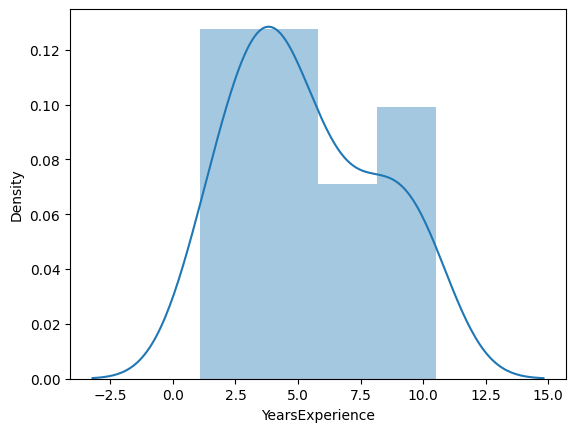

In [9]:
sns.distplot(salary['YearsExperience'])

<ipython-input-10-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

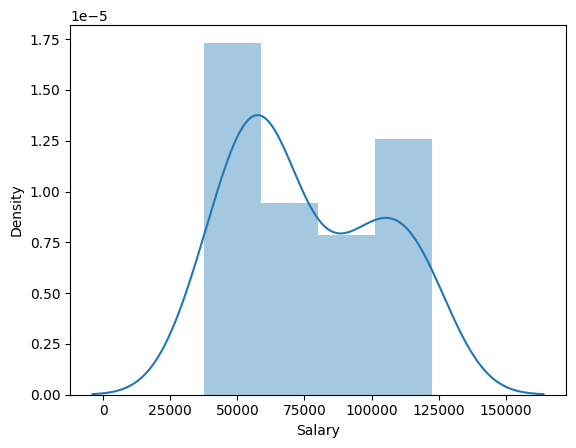

In [10]:
sns.distplot(salary['Salary'])

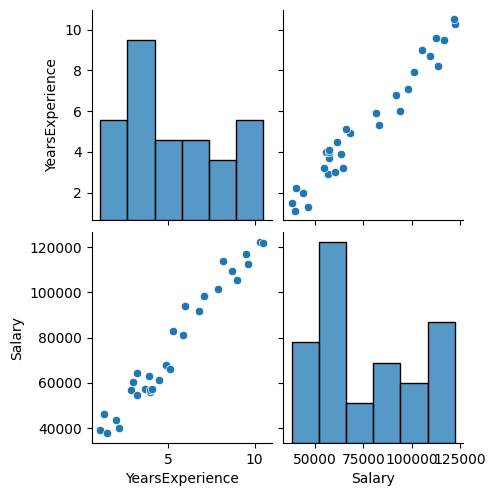

In [11]:
sns.pairplot(salary)

In [12]:
salary.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
salary = salary.rename({'YearsExperience':'Experience'},axis=1)
salary 

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='Experience', ylabel='Salary'>

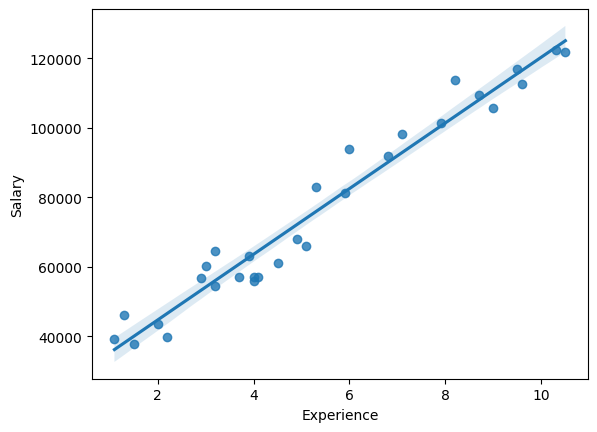

In [14]:
sns.regplot(x=salary['Experience'],y=salary['Salary'])

Model Building


In [15]:
model1 = smf.ols("Salary~Experience",data = salary).fit()

In [16]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues) 

Intercept     25792.200199
Experience     9449.962321
dtype: float64 

 Intercept     11.346940
Experience    24.950094
dtype: float64 

 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


In [17]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.14e-20
Time:                        10:19:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
newdata=pd.Series([7,15])
data_pred=pd.DataFrame(newdata,columns=['Experience'])
data_pred

,Experience
0,7
1,15


In [20]:
model1.predict(data_pred)

0     91941.936449
1    167541.635020
dtype: float64

In [21]:
model2 = smf.ols("Salary~np.log(Experience)",data = salary).fit() 

In [22]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)  

Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64 

 Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64 

 Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64


In [23]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 18 May 2023   Prob (F-statistic):           3.25e-13
Time:                        10:22:00   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model3 = smf.ols("Salary~np.square(Experience)",data = salary).fit()

In [26]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)   

Intercept                48042.585515
np.square(Experience)      776.318773
dtype: float64 

 Intercept                21.973654
np.square(Experience)    17.397015
dtype: float64 

 Intercept                3.389190e-19
np.square(Experience)    1.518127e-16
dtype: float64


In [27]:
(model3.rsquared,model3.rsquared_adj)

(0.9153198857852565, 0.9122955959918728)

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.52e-16
Time:                        10:23:31   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Experience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model4 = smf.ols("Salary~np.sqrt(Experience)",data = salary).fit()

In [30]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues) 

Intercept             -16055.769117
np.sqrt(Experience)    41500.680583
dtype: float64 

 Intercept              -3.262308
np.sqrt(Experience)    19.437148
dtype: float64 

 Intercept              2.906965e-03
np.sqrt(Experience)    8.565358e-18
dtype: float64


In [31]:
(model4.rsquared,model4.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 18 May 2023   Prob (F-statistic):           8.57e-18
Time:                        10:24:58   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Experience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""